In [13]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import torch
import random
import librosa
import torch.utils.data as data

In [2]:
class Dataset(data.Dataset):
    def __init__(self, data_dir='./data_toy', length=3, fps=25, size=224):
        self.length = length
        self.size = size
        self.fps = fps
        self.all_video = glob.glob(os.path.join(data_dir, 'original', 'cropped', '*.mp4'))
        self.all_audio = glob.glob(os.path.join(data_dir, 'numpy', 'audio', '*.npy'))

    def __getitem__(self, index):
        video_path = self.all_video[index]
        audio_path = self.all_audio[index]
        video = self.load_video(video_path)
        return video

    def __len__(self):
        return len(self.all_video)

    def load_video(self, video_path):
        vc = cv2.VideoCapture(video_path)
        num_of_frame = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
        if num_of_frame < 75:
            return False

        target_length = self.length * self.fps
        frames = torch.FloatTensor(target_length, 3, self.size, self.size)
        offset_boundary = num_of_frame - (target_length)
        offset = random.randint(0, offset_boundary)

        for idx in range(offset, offset + target_length):
            frame = vc.read()[1]
            frame = torch.from_numpy(frame)
            # HWC2CHW
            frame = frame.permute(2, 0, 1)
            frames[idx - offset, :, :, :] = frame

        frames /= 255
        return frames


In [10]:
from torch.utils.data import DataLoader
dataset = Dataset('../data_toy')
loader = DataLoader(dataset, batch_size=2, shuffle=True, drop_last=True)

for step, video in enumerate(loader):
    sample = video
    print(sample.shape)
    break


torch.Size([2, 75, 3, 224, 224])


(75, 224, 224, 3)


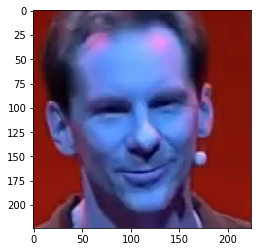

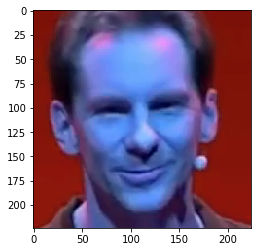

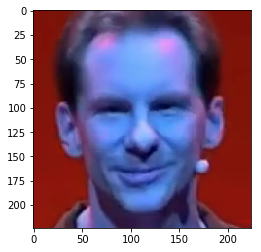

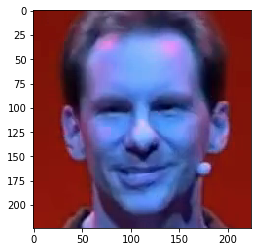

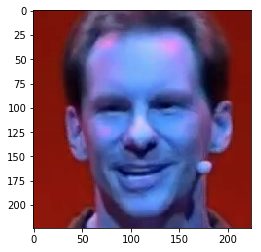

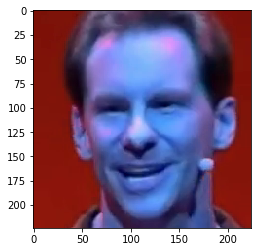

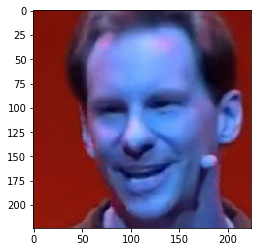

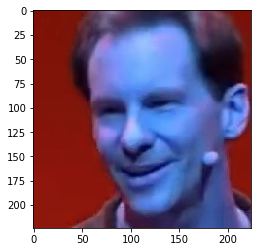

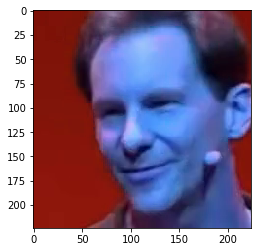

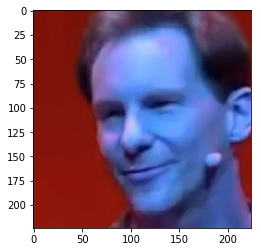

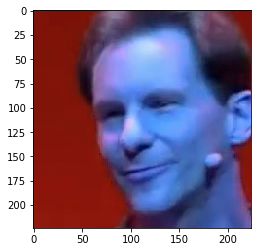

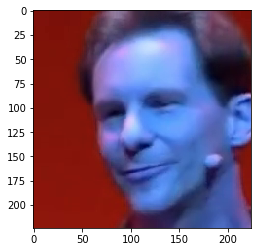

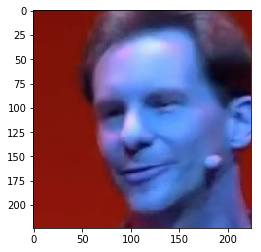

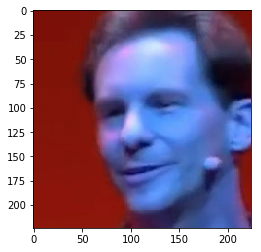

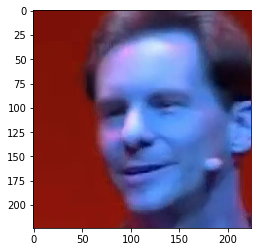

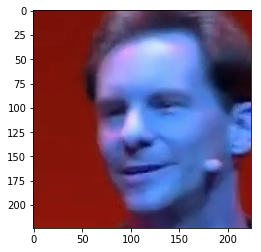

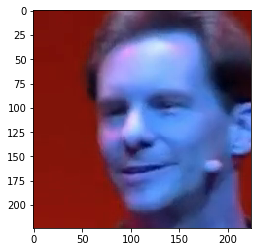

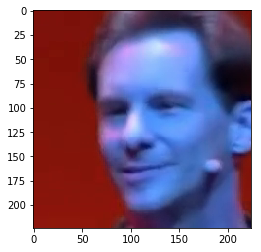

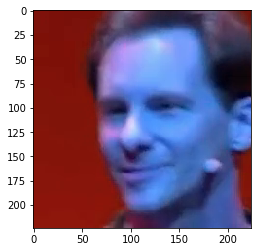

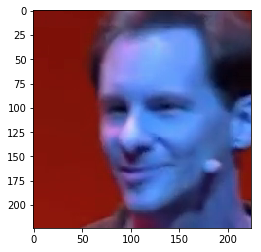

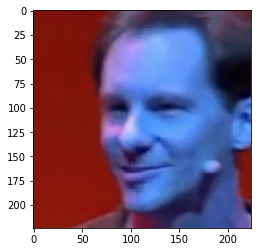

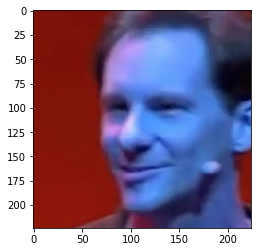

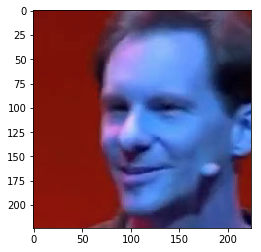

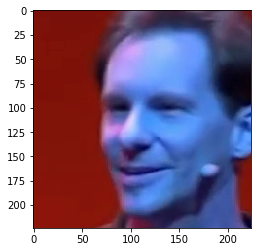

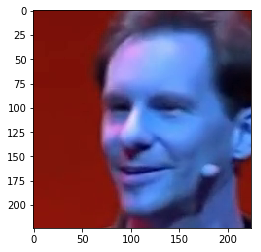

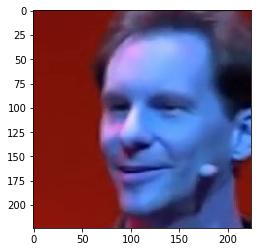

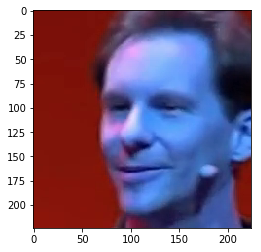

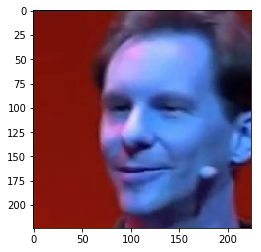

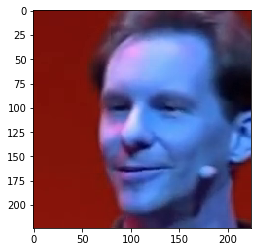

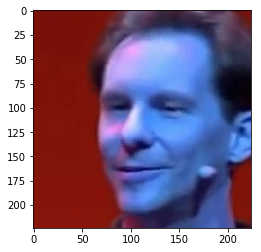

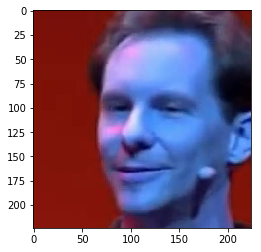

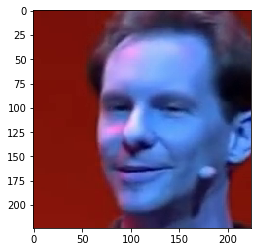

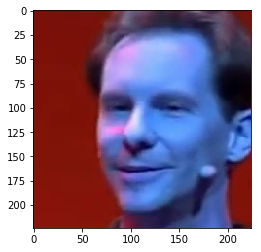

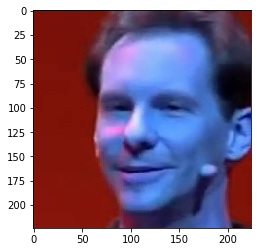

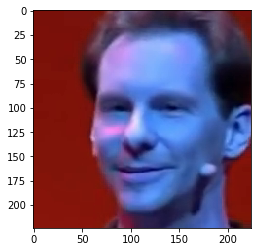

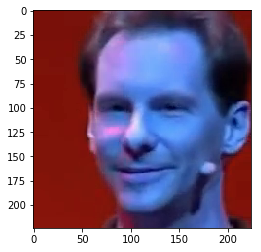

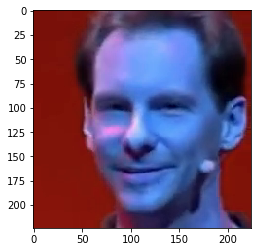

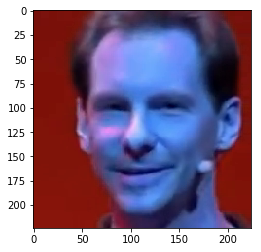

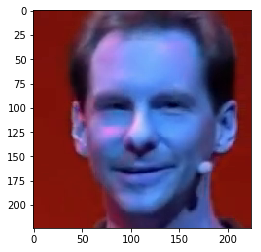

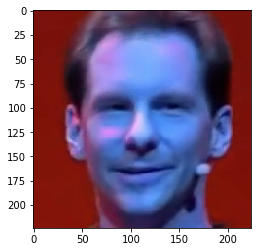

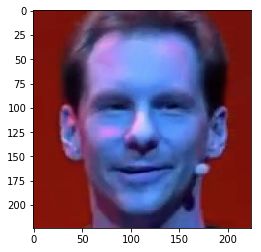

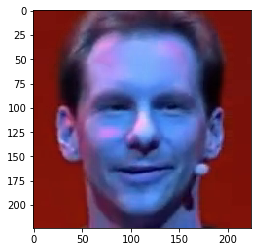

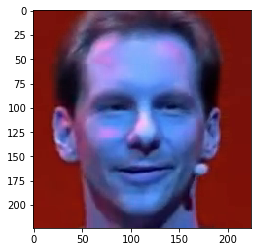

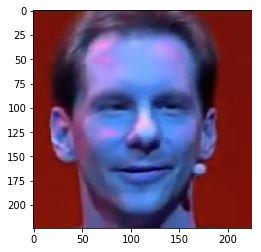

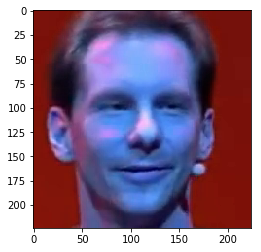

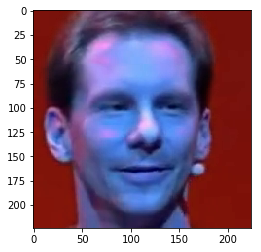

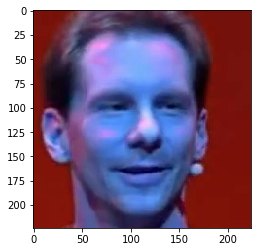

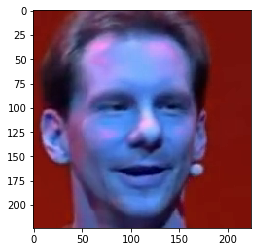

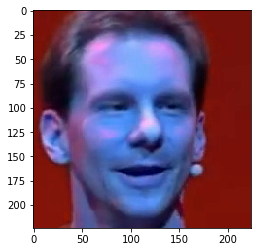

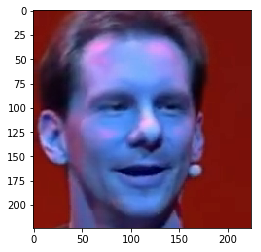

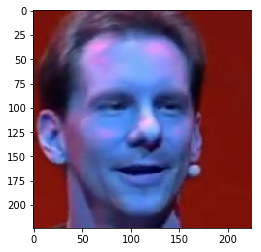

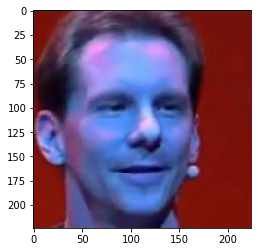

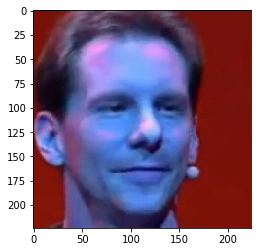

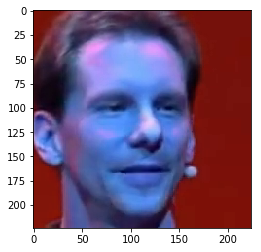

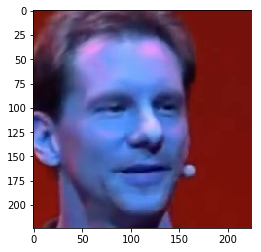

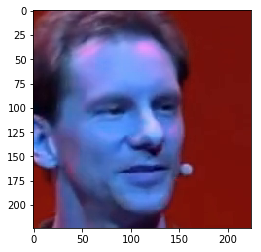

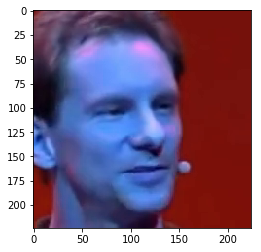

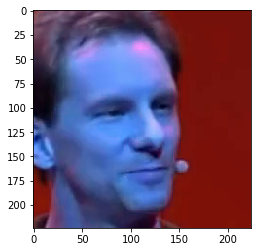

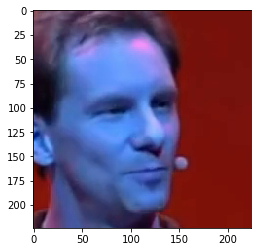

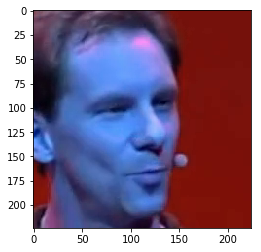

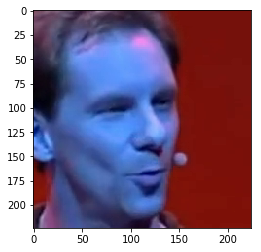

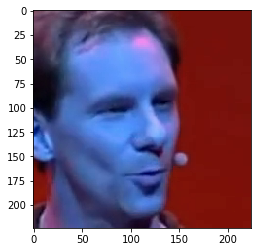

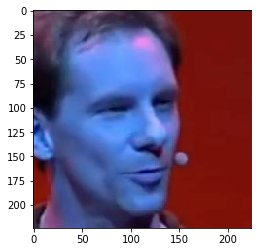

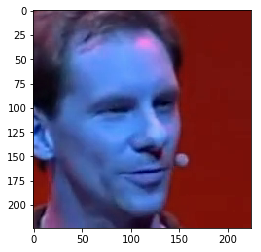

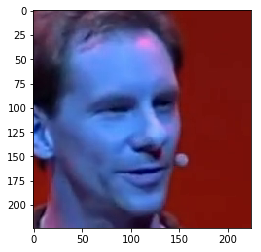

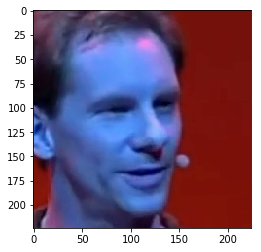

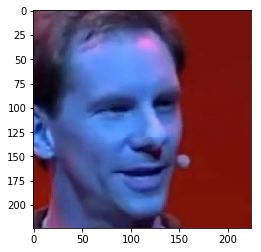

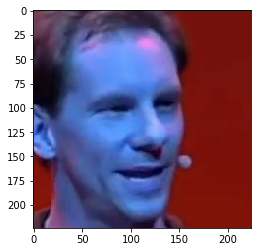

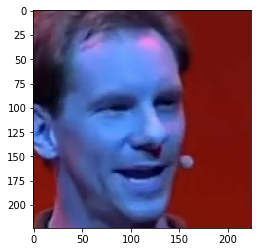

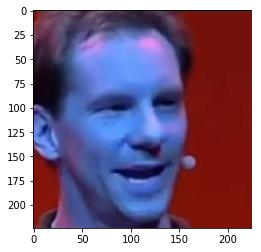

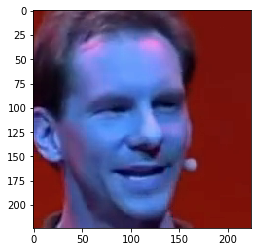

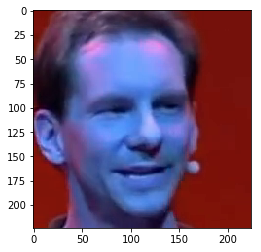

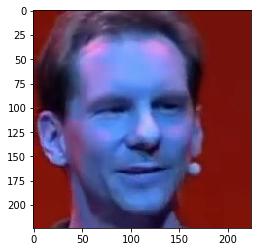

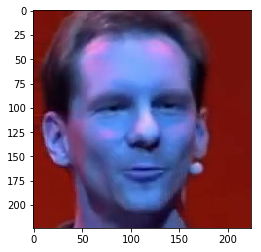

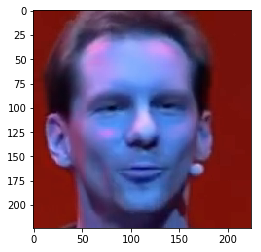

In [14]:
v = sample[0]

v = v.permute(0, 2, 3, 1).numpy()

print(v.shape)
for f in v:
    plt.imshow(f)
    plt.show()